#  Introduction to Python

### part 9 : Pandas

- Python Data Analysis Library 資料處理與數據分析

陳冠廷

#### 參考資料

- https://pandas.pydata.org/docs/user_guide/index.html

- https://medium.com/datainpoint/%E5%BE%9E-pandas-%E9%96%8B%E5%A7%8B-python-%E8%88%87%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8%E4%B9%8B%E6%97%85-8dee36796d4a

- https://ithelp.ithome.com.tw/articles/10233655

- https://www.finlab.tw/pandas-%E9%AD%94%E6%B3%95%E7%AD%86%E8%A8%981-%E5%B8%B8%E7%94%A8%E6%8B%9B%E5%BC%8F%E7%B8%BD%E8%A6%BD/

- [手把手打開 Python 資料分析大門](http://foundation.datasci.tw/py3-data-analysis-171217/)

- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

### 好處
- 能夠快速地進行對資料的前處理，例如缺失值、異質，進行取代或刪除
- pandas 自己就能處理載入、整理與視覺化等常見的資料應用

### 引用套件並縮寫為 pd 
``import pandas as pd`` 

### Pandas處理的資料結構分成兩類：
- Series(一維)
- DataFrame(二維)

如同Excel試算表一般




## pandas資料結構
Pandas的底層數值型態為Numpy，採用Array(陣列)的形式來操作資料矩陣

(主要的差別在list中的資料型別不必相同，而array的中的型別必須全部相同)


### series
Pandas最基本的操作物件，為一維陣列，由values和index組成，index預設值是RangeIndex(start=0, stop=資料長度, step=1)來說。可視一個series為一欄資料序列，而多個series可形成一個table矩陣，有多欄資料，組成另一個重要操作物件：Dataframe。

### dataframe(簡稱df)
與Series差異在data的部分是多維資料，data參數可以填入dict形式或是陣列形式，通常都使用dict。

取df特定欄位的語法為df[‘欄位名’]，dict的key剛好等於df的columns，dict的value剛好等於df的values。df物件的方法包括series的操作方法。

index可以用tuple list來設定多重索引。

![pandas_struc](./images/pandas.png)

## Series 的建立、改index、取值、統計結果

- 更改索引

Pandas在創造Series時會預設好索引值，由0開始，但有時為了方便尋找資料，或想要有更有意義的索引值，可以自己定義索引值，特別注意，在定義時，數量要與資料一樣，且不能重複，不然會有error產生。

- 查看資料

想查看特定的筆數時，有兩種方法可以查看，第一種是利用預設的順序查看，由0開始，往下遞增，如果有自己定義索引，則可以用新的索引查看資料。

In [79]:
import pandas as pd

data = pd.Series([1, 2, 3, 4, 5, 6, 7]) # 使用預設的索引
data1 = pd.Series([1, 2, 3, 4, 5, 6, 7], index = ["a", "b", "c", "d", "e", "f", "g"]) # 自訂索引
data2 = pd.Series([1, 2, 3, 4, 5, 6, 7], index =range(1, 8)) # 自訂索引

print(data.dtype) #查看資料型態
print(data.size)  #查看資料筆數
print(data.index) #查看資料索引
print(data.head)  #取前幾筆資料，預設值為5
print(data.tail)  #取後幾筆資料，預設值為5
print(data.is_unique) #檢查內容值是否不重複

print(data[0])    #查看第一筆資料，按照順序
print(data1["a"]) #查看第一筆資料，按照索引

int64
7
RangeIndex(start=0, stop=7, step=1)
<bound method NDFrame.head of 0    1
1    2
2    3
3    4
4    5
5    6
6    7
dtype: int64>
<bound method NDFrame.tail of 0    1
1    2
2    3
3    4
4    5
5    6
6    7
dtype: int64>
True
1
1


In [80]:
#數值統計分析
import pandas as pd

df = pd.Series([10, 22, 27, 13, 24], index = ["a", "b", "c", "d", "e"]) # 原始資料

print(df.sum())  #所有資料的和
print(df.mean()) #資料的中位數
print(df.std())  #資料的標準差
print(df.var())  #資料的變異數
print(df.prod()) #所有資料的乘積
print(df.max())  #資料的最大值
print(df.min())  #資料的最小值
print(df.nlargest(2))  #資料前兩大的值
print(df.nsmallest(2)) #資料前兩小的值
print(df.describe())   #資料的統計值

96
19.2
7.328028384224504
53.7
1853280
27
10
c    27
e    24
dtype: int64
a    10
d    13
dtype: int64
count     5.000000
mean     19.200000
std       7.328028
min      10.000000
25%      13.000000
50%      22.000000
75%      24.000000
max      27.000000
dtype: float64


#### 字串分析
- 當原始資料的字母大小寫不一時，在分析上會變得很困難，可以利用lower()，upper()，將字串改成統一的大小寫。
  或者，將資料中字串進行轉換，例如把所有的"嗨"，改成"Hi"

- 所有字串的操作都定義在str(string)底下，因此在處理字串時，都要加上str

In [81]:
dfs = pd.Series(["Apple", "Banana", "Cherry"])

print(dfs.str.lower())        #將所有字串的字母變成小寫列印出來
print(dfs.str.upper())        #將所有字串的字母變成大寫列印出來
print(dfs.str.cat(sep = ",")) #將所有字串串接，並用逗號隔開，列印出來
print(dfs.str.contains("a"))  #判斷各個字串是否包含"A"，列印初布林值
print(dfs.str.replace("a","A")) #把各個字串中的"a"取代成"A"列印出來
print(dfs.str.len())            #列印出每個字串的長度

0     apple
1    banana
2    cherry
dtype: object
0     APPLE
1    BANANA
2    CHERRY
dtype: object
Apple,Banana,Cherry
0    False
1     True
2    False
dtype: bool
0     Apple
1    BAnAnA
2    Cherry
dtype: object
0    5
1    6
2    6
dtype: int64


# 二維(DataFrame) 的建立、改index、取值、統計結果

二維的資料，就像表格，DataFrame是由很多個Series組裝出來的，因此Series和DataFrame可互相轉換。因為是由Series組成，因此很多的寫法跟Series相似。

- 建立DataFrame

它的寫法可以對應到Python中的字典，每個key，都有相對應的value，且key不能重複。


In [82]:
import pandas as pd

data = pd.DataFrame({
    "name" : ["Justin", "Joyce"],
    "gender" : ["boy", "girl"],
    "score" : [59, 100]
})

print(data)

     name gender  score
0  Justin    boy     59
1   Joyce   girl    100


- 利用numpy的函數新增

In [83]:
import pandas as pd
import numpy as np

data = np.random.randint(0, 11, (5, 3))
df = pd.DataFrame(data, columns=list('ABC'))

df

,A,B,C
0,2,6,7
1,3,3,4
2,7,5,2
3,3,5,10
4,2,8,0


- 查看資料

因為DataFrame是二維的資料，因此在查看時，分為列(橫)查看及行(直)查看:
    
    *如果輸入key值查看資料的話，會是行(直)查看;
    *若想要列(橫)查看的話，又分為兩種，一種是利用預設的索引，另一種是利用自定義的索引。

而當資料量很多的時候，有時想查看前(後)幾筆，觀察資料就好，則可以使用head()、tail()。

- 資料篩選

loc與iloc為最常用的資料切片方法，前者以值來選取，後者以定位的數值來選取。

兩者皆用list[]來操縱索引和欄位的切片。另外也有at和iat可使用，差別在at和iat是直接取value出來，而不是取series或dataframe格式。

In [84]:
import pandas as pd

data = pd.DataFrame({
    "fruit" : ["apple", "banana", "peach"],
    "price" : [10, 5, 30]
}, index = ["a", "b", "c"])

print(data)
print(data.fruit)    #查看"fruit"的資料，一整行
print(data["fruit"]) #查看"fruit"的資料，一整行

print(data.iloc[0])  #按照預設索引，查看第一列的資料
print(data.loc["b"]) #按照自定義索引，查看"b"一整列的資料

    fruit  price
a   apple     10
b  banana      5
c   peach     30
a     apple
b    banana
c     peach
Name: fruit, dtype: object
a     apple
b    banana
c     peach
Name: fruit, dtype: object
fruit    apple
price       10
Name: a, dtype: object
fruit    banana
price         5
Name: b, dtype: object


In [85]:
import pandas as pd

data = pd.DataFrame({
    "fruit" : ["apple", "banana", "peach", "cherry", "coconut", "grape", "guava"],
    "price" : [10, 5, 30, 20, 50, 25, 15]
})


print(data.head()) # 如果沒有輸入數字，預設是5，查看前五筆資料
print(data.tail()) # 如果沒有輸入數字，預設是5，查看最後五筆資料
print(data.head(3)) # 查看前三筆資料
print(data.tail(3)) # 查看後三筆資料

data_ay = data.fruit.values

print(data_ay) #資料轉成array

     fruit  price
0    apple     10
1   banana      5
2    peach     30
3   cherry     20
4  coconut     50
     fruit  price
2    peach     30
3   cherry     20
4  coconut     50
5    grape     25
6    guava     15
    fruit  price
0   apple     10
1  banana      5
2   peach     30
     fruit  price
4  coconut     50
5    grape     25
6    guava     15
['apple' 'banana' 'peach' 'cherry' 'coconut' 'grape' 'guava']


- 查看資料屬性

與Series一樣，在分析前先查看資料的屬性是很重要的一環，可利用size、shape等查看，或者**info()查看所有的資料的屬性。


In [86]:
import pandas as pd

data = pd.DataFrame({
    "fruit" : ["apple", "banana", "peach", "cherry", "coconut", "grape", "guava"],
    "price" : [10, 5, 30, 20, 50, 25, 15]
})

print(data.size)    #查看資料的總資料數 
print(data.shape)   #查看資料的大小(即幾乘幾)
print(data.columns) #查看所有的標題(key)
print(data.index)   #查看所有的列索引資訊(index)
print(data.info())  #查看所有資料的屬性，以每個Series顯示
print(data.describe()) #各數值變數的描述統計

14
(7, 2)
Index(['fruit', 'price'], dtype='object')
RangeIndex(start=0, stop=7, step=1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
fruit    7 non-null object
price    7 non-null int64
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes
None
           price
count   7.000000
mean   22.142857
std    14.960265
min     5.000000
25%    12.500000
50%    20.000000
75%    27.500000
max    50.000000


- 更改資料

當DataFrame已經建立好後，若要修改標題(key)，或是資料的內容。



In [87]:
import pandas as pd

# 原始資料
data = pd.DataFrame({
    "name" : ["Justin", "Joyce"],
    "gender" : ["boy", "girl"],
    "score" : [59, 100]
}) 

print(data)
data.columns = ["Name", "Gender", "score"]              #更改標題，用此方法需要重新輸入所有標題，即使只需修改一個
data.rename(columns = {"score":"Score"},inplace = True) #更改標題，只需更改要改變的值
print(data)

data.loc[0, "Score"] = 30           #修改第一列，"score"的值
data.loc[0] = ["Alice", "girl", 90] #修改第一列全部的值
print(data)

#inplace = True 不會創立新的物件，直接對原資料進行修改
#inplace = Flase 更改後給新的物件，原資料不變
#預設為Flase

     name gender  score
0  Justin    boy     59
1   Joyce   girl    100
     Name Gender  Score
0  Justin    boy     59
1   Joyce   girl    100
    Name Gender  Score
0  Alice   girl     90
1  Joyce   girl    100


- 更改索引

這裡也與Series一樣，如果沒有自定義索引的話，會使用預設索引，想要改變索引可在字典後加上index。


In [88]:
import pandas as pd

#使用預設索引
data = pd.DataFrame({
    "name" : ["Justin", "Joyce"],
    "gender" : ["boy", "girl"],
    "score" : [59, 100]
}) 

print(data)


#使用自定義索引
data = pd.DataFrame({
    "name" : ["Justin", "Joyce"],
    "gender" : ["boy", "girl"],
    "score" : [59, 100]
}, index = ["a", "b"]) 

print(data)

     name gender  score
0  Justin    boy     59
1   Joyce   girl    100
     name gender  score
a  Justin    boy     59
b   Joyce   girl    100


- 增加新欄位(行)

在設定資料時，或分析資料時，有時會想要新增欄位，讓資料更完整，或更加方便判斷。

因為DataFrame是由一個Series組成，因此想法上就像在增加一個Series，新加入的欄位會由最後面加上，如果要插在中間的話，需要使用insert這個函數。


In [89]:
import pandas as pd

data = pd.DataFrame({
    "fruit" : ["apple", "banana", "peach"],
    "price" : [10, 5, 30]
})

print(data)

data["cp"] = [3, 2, 5]                                     #利用list的方式，增加新的欄位
data["from"] = pd.Series(["Taipei", "Taichung", "Tainan"]) #利用Series的方式，增加新的欄位
print(data)


data.insert(2, "amount", 0)       #將"amount"插入在第二行，將初始值令為0
data["amount"] = [100, 300, 200]  #更改"amount"的值
print(data)

    fruit  price
0   apple     10
1  banana      5
2   peach     30
    fruit  price  cp      from
0   apple     10   3    Taipei
1  banana      5   2  Taichung
2   peach     30   5    Tainan
    fruit  price  amount  cp      from
0   apple     10     100   3    Taipei
1  banana      5     300   2  Taichung
2   peach     30     200   5    Tainan


- 增加新欄位(列)
有時，會要加入新的資料，可以使用append的方式，在最後面加上資料。


In [90]:
import pandas as pd

#原始資料
data = pd.DataFrame({
    "fruit" : ["apple", "banana", "peach"],
    "price" : [10, 5, 30]
}) 
print(data)

#新的資料內容
new_data = pd.DataFrame({
    "fruit" : "cherry",
    "price" : 20
},index = [3]) 

data = data.append(new_data) # 加上新的資料
print(data)

    fruit  price
0   apple     10
1  banana      5
2   peach     30
    fruit  price
0   apple     10
1  banana      5
2   peach     30
3  cherry     20


- 刪除欄位(行及列)

利用drop函數，把不需要或錯誤的資料刪除掉。

可以刪除一行或一列

建議原始的資料不要動到，如果要動到的話，可以先複製一份，更改複製的版本



In [91]:
import pandas as pd

# 原始資料
data = pd.DataFrame({
    "name" : ["Justin", "Joyce"],
    "gender" : ["boy", "girl"],
    "score" : [59, 100]
}) 
print(data)

data.drop(["gender"], axis=1, inplace=True) # 以行為軸，刪除"gender"這一行
print(data)

data.drop([0], inplace=True) # 以列為軸，利用預設的索引值，刪除第一筆資料
print(data)

     name gender  score
0  Justin    boy     59
1   Joyce   girl    100
     name  score
0  Justin     59
1   Joyce    100
    name  score
1  Joyce    100



- 讀取檔案

在實際的操作上，我們會希望能從檔案中讀取資料進行分析，pandas支援多種文字、二進位檔案與資料庫的資料載入，常見的 txt、csv、excel 試算表、MySQL等。最常見的是csv檔。

pandas提供多種格式可以輸出/輸入資料

https://pandas.pydata.org/pandas-docs/stable/reference/io.html

In [92]:
import pandas as pd

#在讀取檔案時，須將檔案放在與執行檔的同一個資料夾，或是用相對(絕對)的路徑去讀取

#讀取csv檔
data_csv = pd.read_csv('filename_csv.csv')  

#讀取excel檔
#data_xls = pd.read_excel('filename.xlsx', 'sheetname')
data_xls = pd.read_excel('filename.xlsx', '工作表1')

# df_load = pd.read_csv('gen.csv', index_col=0)  
# 因為在產生csv檔時，第一行為index
# 所以讀檔時需將第一行視為index，否則也會被當成資料

data_xls

,NAME,General Physics,Classical Mechanics,Calculus,Optics,Statistics
0,S1,99,64,21,70,67
1,S2,41,82,31,68,58
2,S3,91,78,72,85,36
3,S4,52,67,33,65,46
4,S5,67,79,77,18,93
5,S6,71,55,56,18,90
6,S7,91,37,21,82,12
7,S8,70,70,51,61,69
8,S9,99,91,61,39,57
9,S10,70,79,47,34,60




![圖示](./images/pandas_col_index.jpg)

In [93]:
# 讀取 HTML
import pandas as pd
dfs = pd.read_html('http://rate.bot.com.tw/xrt?Lang=zh-TW')  
dfs[0]  

幣別                        現金匯率          \
                        幣別 Unnamed: 1_level_1     本行買入    本行賣出   
0       美金 (USD)  美金 (USD)             27.565   28.235  27.915   
1       港幣 (HKD)  港幣 (HKD)              3.444    3.648    3.57   
2       英鎊 (GBP)  英鎊 (GBP)              37.42    39.54   38.43   
3       澳幣 (AUD)  澳幣 (AUD)              21.17    21.95   21.46   
4   加拿大幣 (CAD)  加拿大幣 (CAD)              22.24    23.15   22.64   
5   新加坡幣 (SGD)  新加坡幣 (SGD)               20.4    21.31   20.89   
6   瑞士法郎 (CHF)  瑞士法郎 (CHF)              29.78    30.98   30.46   
7       日圓 (JPY)  日圓 (JPY)             0.2458   0.2586  0.2531   
8     南非幣 (ZAR)  南非幣 (ZAR)                  -        -   1.888   
9     瑞典幣 (SEK)  瑞典幣 (SEK)               2.91     3.43    3.25   
10      紐元 (NZD)  紐元 (NZD)              19.55     20.4   19.93   
11      泰幣 (THB)  泰幣 (THB)             0.7683   0.9583  0.8807   
12  菲國比索 (PHP)  菲國比索 (PHP)             0.5078   0.6408       -   
13    印尼幣 (IDR)  印尼幣 (IDR)            0.00158  0.00228       -   
14      歐元 (EUR)  歐元 (EUR)              32.79    34.13   33.41   
15      韓元 (KRW)  韓元 (KRW)            0.02321  0.02711       -   
16    越南盾 (VND)  越南盾 (VND)            0.00084  0.00134       -   
17    馬來幣 (MYR)  馬來幣 (MYR)              5.706    7.331       -   
18    人民幣 (CNY)  人民幣 (CNY)              4.218     4.38    4.29   

   Unnamed: 4_level_0 即期匯率                    Unnamed: 7_level_0     遠期匯率  \
                 本行買入 本行賣出 Unnamed: 6_level_1               本行買入     遠期匯率   
0              28.015   查詢                 查詢             27.565   28.235   
1                3.63   查詢                 查詢              3.444    3.648   
2               38.83   查詢                 查詢              37.42    39.54   
3               21.66   查詢                 查詢              21.17    21.95   
4               22.84   查詢                 查詢              22.24    23.15   
5               21.07   查詢                 查詢               20.4    21.31   
6               30.71   查詢                 查詢              29.78    30.98   
7              0.2571   查詢                 查詢             0.2458   0.2586   
8               1.968   查詢                 查詢                  -        -   
9                3.35   查詢                 查詢               2.91     3.43   
10              20.13   查詢                 查詢              19.55     20.4   
11             0.9207   查詢                 查詢             0.7683   0.9583   
12                  -   查詢                 查詢             0.5078   0.6408   
13                  -   查詢                 查詢            0.00158  0.00228   
14              33.81   查詢                 查詢              32.79    34.13   
15                  -   查詢                 查詢            0.02321  0.02711   
16                  -   查詢                 查詢            0.00084  0.00134   
17                  -   查詢                 查詢              5.706    7.331   
18               4.34   查詢                 查詢              4.218     4.38   

      歷史匯率           現金匯率        Unnamed: 13_level_0                即期匯率  \
      歷史匯率    本行賣出 本行買入.1 本行賣出.1 Unnamed: 13_level_1 Unnamed: 14_level_1   
0   27.915  28.015    NaN    NaN                 NaN                 NaN   
1     3.57    3.63    NaN    NaN                 NaN                 NaN   
2    38.43   38.83    NaN    NaN                 NaN                 NaN   
3    21.46   21.66    NaN    NaN                 NaN                 NaN   
4    22.64   22.84    NaN    NaN                 NaN                 NaN   
5    20.89   21.07    NaN    NaN                 NaN                 NaN   
6    30.46   30.71    NaN    NaN                 NaN                 NaN   
7   0.2531  0.2571    NaN    NaN                 NaN                 NaN   
8    1.888   1.968    NaN    NaN                 NaN                 NaN   
9     3.25    3.35    NaN    NaN                 NaN                 NaN   
10   19.93   20.13    NaN    NaN                 NaN                 NaN   
11  0.8807  0.9207    NaN    Na

- 檢查資料

  有時資料會有空值、缺失值，需要進行資料的前處理，常見的方式有兩種，第一種是刪除，第二種是補齊

    - 檢查na值或空值是否存在 `DataFrame.isna()` 

    - 刪除  `DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)` 

    - 補齊 `DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)`

       method參數中的ffill和bifill，前者是拿na前的資料補，後者是拿na後的資料補。limit參數決定要補幾個na，預設是全補。


In [94]:
import pandas as pd
import numpy as np

df = pd.DataFrame(dict(age=[5, 6, np.NaN],
                   born=[pd.NaT, pd.Timestamp('1939-05-27'),
                         pd.Timestamp('1940-04-25')],
                   name=['Alfred', 'Batman', ''],
                   toy=[None, 'Batmobile', 'Joker']))
print(df)
print(df.isna()) #if the values are NA. NA values, such as None or numpy.NaN
print(df.notna()) 

   age       born    name        toy
0  5.0        NaT  Alfred       None
1  6.0 1939-05-27  Batman  Batmobile
2  NaN 1940-04-25              Joker
     age   born   name    toy
0  False   True  False   True
1  False  False  False  False
2   True  False  False  False
     age   born  name    toy
0   True  False  True  False
1   True   True  True   True
2  False   True  True   True


In [95]:
import pandas as pd
import numpy as np

df = pd.DataFrame(dict(age=[5, 6, np.NaN],
                   born=[pd.NaT, pd.Timestamp('1939-05-27'),
                         pd.Timestamp('1940-04-25')],
                   name=['Alfred', 'Batman', ''],
                   toy=[None, 'Batmobile', 'Joker']))

#如果有列存在缺失值整列刪除
df.dropna(inplace = True) 

df

,age,born,name,toy
1,6.0,1939-05-27,Batman,Batmobile


In [96]:
import pandas as pd
import numpy as np

df = pd.DataFrame(dict(age=[5, 6, np.NaN],
                   born=[pd.NaT, pd.Timestamp('1939-05-27'),
                         pd.Timestamp('1940-04-25')],
                   name=['Alfred', 'Batman', ''],
                   toy=[None, 'Batmobile', 'Joker']))

#如果有行存在缺失值整行刪除
df.dropna(axis=1, inplace = True) 
df

,name
0,Alfred
1,Batman
2,


In [97]:
import pandas as pd
import numpy as np

df = pd.DataFrame(dict(age=[5, 6, np.NaN],
                   born=[pd.NaT, pd.Timestamp('1939-05-27'),
                         pd.Timestamp('1940-04-25')],
                   name=['Alfred', 'Batman', ''],
                   toy=[None, 'Batmobile', 'Joker']))

df.fillna(value = "NULL", inplace = True) # 如果有資料有缺失值則填入"NULL"

df

,age,born,name,toy
0,5,NULL,Alfred,NULL
1,6,1939-05-27 00:00:00,Batman,Batmobile
2,NULL,1940-04-25 00:00:00,,Joker


- 匯出檔案

在處理完資料，獲得結果後，最後一步就是輸出結果了





In [98]:
data.to_csv("output.csv", index = False) # 將data輸出成csv檔，名稱叫"output.csv"
#index = Flase 表示在輸出時，不要保留索引值，預設為True

### 綜合練習

In [99]:
import pandas as pd

#讀取csv檔
data_csv = pd.read_csv('filename_csv.csv')  

#資料屬性與統計分析
print(data_csv)
print(data_csv.info())
print(data_csv.mean())
print(data_csv.std())
print(data_csv.describe())
print(data_csv.corr())

  NAME  General Physics  Classical Mechanics  Calculus  Optics  Statistics
0   S1               99                   64        21      70          67
1   S2               41                   82        31      68          58
2   S3               91                   78        72      85          36
3   S4               52                   67        33      65          46
4   S5               67                   79        77      18          93
5   S6               71                   55        56      18          90
6   S7               91                   37        21      82          12
7   S8               70                   70        51      61          69
8   S9               99                   91        61      39          57
9  S10               70                   79        47      34          60
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
NAME                   10 non-null object
General Physics        10 non-nu

In [100]:
#輸出key為Calculus的資料
data_csv["Calculus"] 

0    21
1    31
2    72
3    33
4    77
5    56
6    21
7    51
8    61
9    47
Name: Calculus, dtype: int64

In [101]:
#輸出key為NAME的資料
data_csv["NAME"]

0     S1
1     S2
2     S3
3     S4
4     S5
5     S6
6     S7
7     S8
8     S9
9    S10
Name: NAME, dtype: object

In [102]:
#輸出index 1~3
data_csv[1:4]

,NAME,General Physics,Classical Mechanics,Calculus,Optics,Statistics
1,S2,41,82,31,68,58
2,S3,91,78,72,85,36
3,S4,52,67,33,65,46


In [103]:
data_csv.loc[5] #輸出index=5列

NAME                   S6
General Physics        71
Classical Mechanics    55
Calculus               56
Optics                 18
Statistics             90
Name: 5, dtype: object

In [104]:
#輸出Calculus=77的資料
data_csv[data_csv['Calculus'] == 77]

,NAME,General Physics,Classical Mechanics,Calculus,Optics,Statistics
4,S5,67,79,77,18,93


In [105]:
#多條件：輸出Calculus>33且Optics>60的資料
data_csv[(data_csv['Calculus'] >33) & (data_csv['Optics'] >60)]

,NAME,General Physics,Classical Mechanics,Calculus,Optics,Statistics
2,S3,91,78,72,85,36
7,S8,70,70,51,61,69


In [106]:
#多加一colums(行)為沿著axis=1的加總(算總分)並命名為Total
data_csv["Total"] = data_csv.sum(axis=1)
data_csv

,NAME,General Physics,Classical Mechanics,Calculus,Optics,Statistics,Total
0,S1,99,64,21,70,67,321
1,S2,41,82,31,68,58,280
2,S3,91,78,72,85,36,362
3,S4,52,67,33,65,46,263
4,S5,67,79,77,18,93,334
5,S6,71,55,56,18,90,290
6,S7,91,37,21,82,12,243
7,S8,70,70,51,61,69,321
8,S9,99,91,61,39,57,347
9,S10,70,79,47,34,60,290


In [107]:
### 多加一colums(行)為沿著axis=1的加權總分並命名為Wweighted Total
data_csv["Weighted Total"] = 1.5*data_csv["General Physics"] + data_csv["Classical Mechanics"] + 2.0*data_csv["Calculus"] + data_csv["Optics"] + data_csv["Statistics"] 
data_csv

,NAME,General Physics,Classical Mechanics,Calculus,Optics,Statistics,Total,Weighted Total
0,S1,99,64,21,70,67,321,391.5
1,S2,41,82,31,68,58,280,331.5
2,S3,91,78,72,85,36,362,479.5
3,S4,52,67,33,65,46,263,322.0
4,S5,67,79,77,18,93,334,444.5
5,S6,71,55,56,18,90,290,381.5
6,S7,91,37,21,82,12,243,309.5
7,S8,70,70,51,61,69,321,407.0
8,S9,99,91,61,39,57,347,457.5
9,S10,70,79,47,34,60,290,372.0


In [108]:
#以Total數字做排序，輸出前三名
#by 選定axis中的哪個key或index排序
#ascending=True，升序排序，=False，降序
df2 = data_csv.sort_values(by="Total", ascending=False).head(3)
df2

,NAME,General Physics,Classical Mechanics,Calculus,Optics,Statistics,Total,Weighted Total
2,S3,91,78,72,85,36,362,479.5
8,S9,99,91,61,39,57,347,457.5
4,S5,67,79,77,18,93,334,444.5


In [109]:
#先對Total排序，同分再排Calcculus
data_csv.sort_values(by=["Total","Calculus"], ascending=False).head(3)


,NAME,General Physics,Classical Mechanics,Calculus,Optics,Statistics,Total,Weighted Total
2,S3,91,78,72,85,36,362,479.5
8,S9,99,91,61,39,57,347,457.5
4,S5,67,79,77,18,93,334,444.5


In [110]:
#重設index，使排序後index為名次
df2 = data_csv.sort_values(by=["Total","Calculus"], ascending=False)
#df2.reindex(range(100))
#df2.reset_index()
df2.index = range(1, 11)
df2

,NAME,General Physics,Classical Mechanics,Calculus,Optics,Statistics,Total,Weighted Total
1,S3,91,78,72,85,36,362,479.5
2,S9,99,91,61,39,57,347,457.5
3,S5,67,79,77,18,93,334,444.5
4,S8,70,70,51,61,69,321,407.0
5,S1,99,64,21,70,67,321,391.5
6,S6,71,55,56,18,90,290,381.5
7,S10,70,79,47,34,60,290,372.0
8,S2,41,82,31,68,58,280,331.5
9,S4,52,67,33,65,46,263,322.0
10,S7,91,37,21,82,12,243,309.5


# 繪圖

`%pylab inline`(在Jupyter-notebook須加入)

pandas 套件將 matplotlib.pyplot 的基礎圖形包裝起來成為一個方法，
只要呼叫 df.plot() 就能便利地繪圖，可以選擇的圖形種類只要指定 kind=：

- ‘line’ : 線圖（預設）
- ‘bar’ : 垂直長條圖
- ‘barh’ : 水平長條圖
- ‘hist’ : 直方圖
- ‘box’ : 盒鬚圖
- ‘scatter’ : 散佈圖
- ‘hexbin’ : hexbin plot

Populating the interactive namespace from numpy and matplotlib


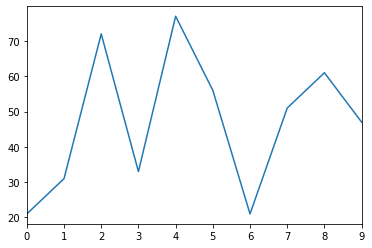

In [111]:
%pylab inline

import pandas as pd

#讀取csv檔
data_csv = pd.read_csv('filename_csv.csv')  

#data_csv["Calculus"].plot()
data_csv.Calculus.plot()

Populating the interactive namespace from numpy and matplotlib
                   A         B         C         D
2000-01-01  0.276040 -0.886733 -0.681489  1.721328
2000-01-02 -1.402964  0.364581 -0.173749 -1.384289
2000-01-03 -1.377819 -1.220094  0.245841 -0.674565
2000-01-04  0.051794 -0.095940  0.198857 -1.531114
2000-01-05  0.704325  1.192070  0.213065 -0.136070
...              ...       ...       ...       ...
2002-09-22  0.327088 -0.669000  1.451883 -2.053700
2002-09-23 -1.617210  0.858925  0.025533  0.217185
2002-09-24 -0.521940 -0.118914  1.860310  1.233114
2002-09-25 -0.284001  0.177430 -1.624534 -0.762703
2002-09-26 -0.058454 -0.291583  0.302798  1.392105

[1000 rows x 4 columns]


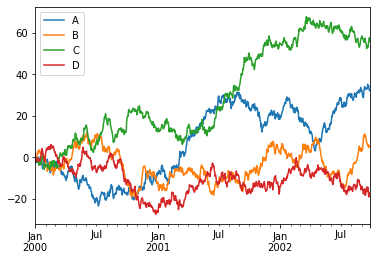

In [112]:
%pylab inline

import pandas as pd
import numpy as np

da_index = pd.date_range("1/1/2000", periods=1000)
df = pd.DataFrame(np.random.randn(1000, 4), index=da_index, columns=list("ABCD"))

print(df)
df = df.cumsum() #累計數值

df.plot()

Populating the interactive namespace from numpy and matplotlib


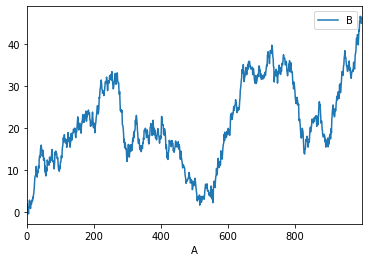

In [113]:
%pylab inline

import pandas as pd
import numpy as np


df3 = pd.DataFrame(np.random.randn(1000, 2), columns=["B", "C"]).cumsum()

df3["A"] = pd.Series(list(range(len(df))))

df3.plot(x="A", y="B")
#By default, pandas will pick up index name as xlabel, while leaving it empty for ylabel.

### log-scale

Populating the interactive namespace from numpy and matplotlib


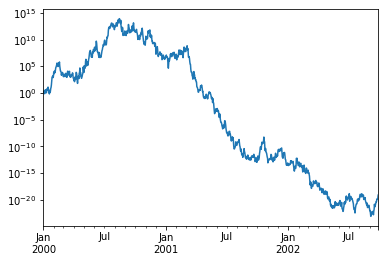

In [114]:
%pylab inline

import pandas as pd
import numpy as np

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = np.exp(ts.cumsum())

ts.plot(logy=True)

### secondary y-axis

Populating the interactive namespace from numpy and matplotlib


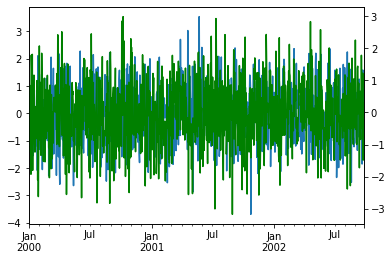

In [115]:
%pylab inline

import pandas as pd
import numpy as np


da_index = pd.date_range("1/1/2000", periods=1000)
df = pd.DataFrame(np.random.randn(1000, 4), index=da_index, columns=list("ABCD"))

df["A"].plot()

df["B"].plot(secondary_y=True, style="g")

### subplots

Populating the interactive namespace from numpy and matplotlib


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020170B62CC0>,
      dtype=object)

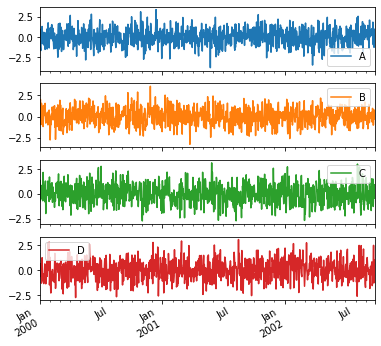

In [116]:
%pylab inline

import pandas as pd
import numpy as np


da_index = pd.date_range("1/1/2000", periods=1000)
df = pd.DataFrame(np.random.randn(1000, 4), index=da_index, columns=list("ABCD"))

df.plot(subplots=True, figsize=(6, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020170E285C0>,
      dtype=object)

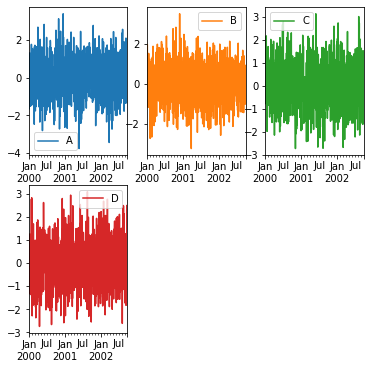

In [117]:
df.plot(subplots=True, layout=(2, 3), figsize=(6, 6), sharex=False)

## 長條圖

Populating the interactive namespace from numpy and matplotlib


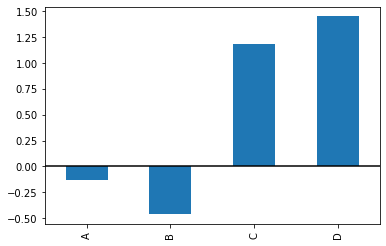

In [118]:
%pylab inline
import pandas as pd
import numpy as np


da_index = pd.date_range("1/1/2000", periods=1000)
df = pd.DataFrame(np.random.randn(1000, 4), index=da_index, columns=list("ABCD"))

df.iloc[5].plot(kind="bar")
plt.axhline(0, color="k")

Populating the interactive namespace from numpy and matplotlib


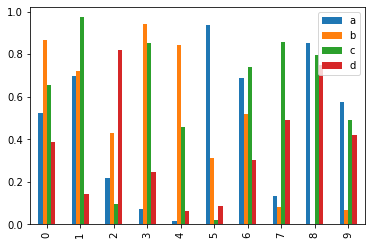

In [119]:
%pylab inline
import pandas as pd
import numpy as np

df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])

df2.plot.bar()

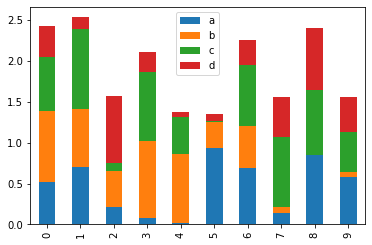

In [120]:
df2.plot.bar(stacked=True) #推疊

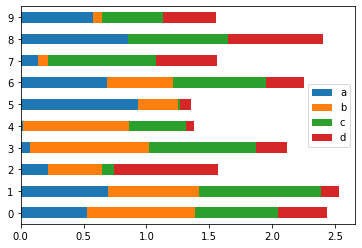

In [121]:
df2.plot.barh(stacked=True) #水平長條圖

### Error bars

Populating the interactive namespace from numpy and matplotlib
             data1  data2
letter word              
a      bar     3.5    6.0
       foo     2.5    5.5
b      bar     2.5    5.5
       foo     3.0    4.5
                data1     data2
letter word                    
a      bar   0.707107  1.414214
       foo   0.707107  0.707107
b      bar   0.707107  0.707107
       foo   1.414214  0.707107


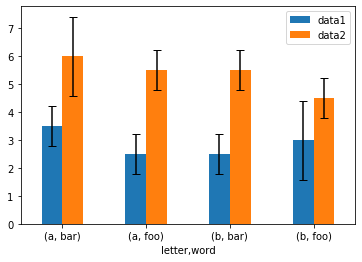

In [122]:
%pylab inline
import pandas as pd
import numpy as np

# Generate the data
ix3 = pd.MultiIndex.from_arrays([
["a", "a", "a", "a", "b", "b", "b", "b"],
["foo", "foo", "bar", "bar", "foo", "foo", "bar", "bar"],
 ],
 names=["letter", "word"],
)


df3 = pd.DataFrame(
{
 "data1": [3, 2, 4, 3, 2, 4, 3, 2],
 "data2": [6, 5, 7, 5, 4, 5, 6, 5],
},
 index=ix3,
)


# Group by index labels and take the means and standard deviations
# for each group
gp3 = df3.groupby(level=("letter", "word"))

means = gp3.mean()
errors = gp3.std()

print(means)
print(errors)


# Plot
fig, ax = plt.subplots()

means.plot.bar(yerr=errors, ax=ax, capsize=4, rot=0)

## 直方圖

Populating the interactive namespace from numpy and matplotlib


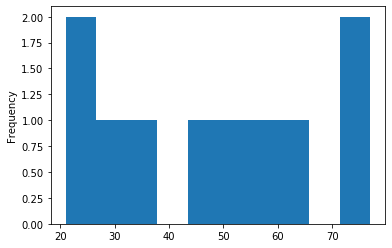

In [123]:
%pylab inline
import pandas as pd
import numpy as np

data_csv = pd.read_csv('filename_csv.csv')  
data_csv.Calculus.plot(kind='hist')

Populating the interactive namespace from numpy and matplotlib


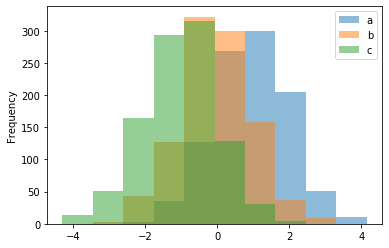

In [124]:
%pylab inline
import pandas as pd
import numpy as np


df4 = pd.DataFrame({
          "a": np.random.randn(1000) + 1,
          "b": np.random.randn(1000),
          "c": np.random.randn(1000) - 1,
                    },
          columns=["a", "b", "c"],
                     )
 
df4.plot.hist(alpha=0.5)

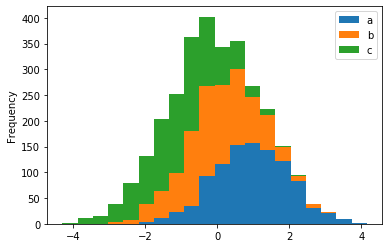

In [125]:
df4.plot.hist(stacked=True, bins=20)   #推疊

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002017259AC50>,
      dtype=object)

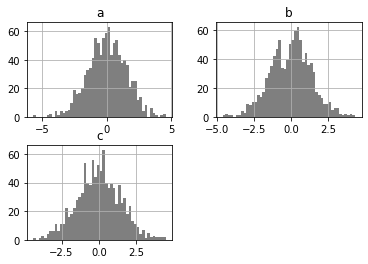

In [126]:
#plots the histograms of the columns on multiple subplots
df4.diff().hist(color="k", alpha=0.5, bins=50) 

## 盒鬚圖

Populating the interactive namespace from numpy and matplotlib


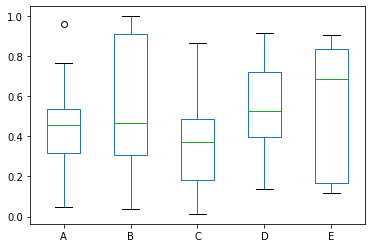

In [127]:
%pylab inline
import pandas as pd
import numpy as np


df = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])

df.plot.box()

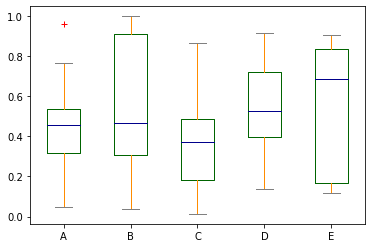

In [128]:
#更改顏色

color = {
"boxes": "DarkGreen",
"whiskers": "DarkOrange",
"medians": "DarkBlue",
"caps": "Gray",
}

df.plot.box(color=color, sym="r+");

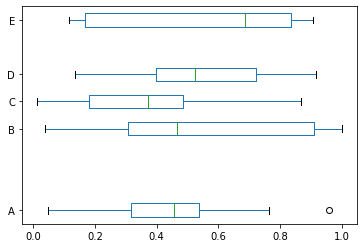

In [129]:
#水平繪製
df.plot.box(vert=False, positions=[1, 4, 5, 6, 8])

## Area plot

Populating the interactive namespace from numpy and matplotlib


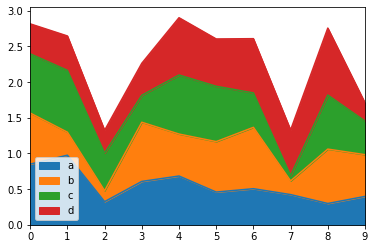

In [130]:
%pylab inline
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])

df.plot.area() #Area plots are stacked by default

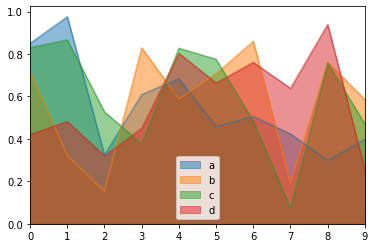

In [131]:
df.plot.area(stacked=False)

## Scatter plot

Populating the interactive namespace from numpy and matplotlib


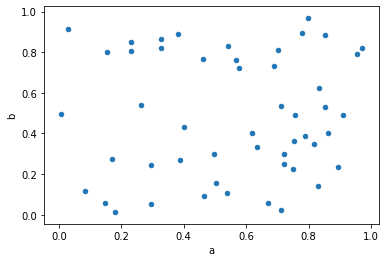

In [132]:
%pylab inline
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.rand(50, 4), columns=["a", "b", "c", "d"])

df.plot.scatter(x="a", y="b")

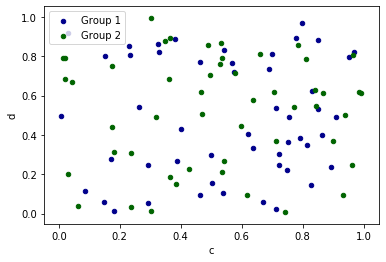

In [133]:
ax = df.plot.scatter(x="a", y="b", color="DarkBlue", label="Group 1")

df.plot.scatter(x="c", y="d", color="DarkGreen", label="Group 2", ax=ax)

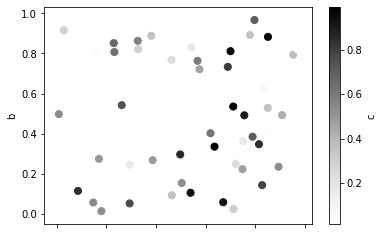

In [134]:
df.plot.scatter(x="a", y="b", c="c", s=50)

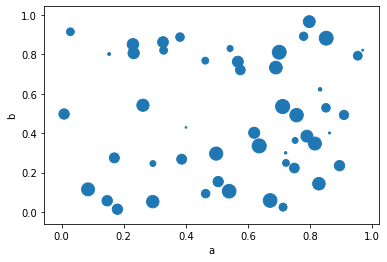

In [135]:
df.plot.scatter(x="a", y="b", s=df["c"] * 200)

## Hexagonal bin plot

Populating the interactive namespace from numpy and matplotlib


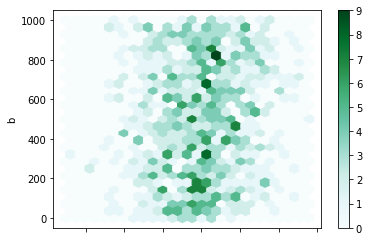

In [136]:
%pylab inline
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(1000, 2), columns=["a", "b"])

df["b"] = df["b"] + np.arange(1000)

df.plot.hexbin(x="a", y="b", gridsize=25)

Populating the interactive namespace from numpy and matplotlib


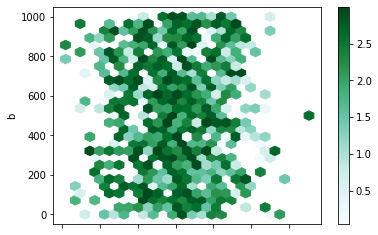

In [137]:
%pylab inline
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(1000, 2), columns=["a", "b"])

df["b"] = df["b"] = df["b"] + np.arange(1000)

df["z"] = np.random.uniform(0, 3, 1000)

df.plot.hexbin(x="a", y="b", C="z", reduce_C_function=np.max, gridsize=25);

## Pie plot

Populating the interactive namespace from numpy and matplotlib


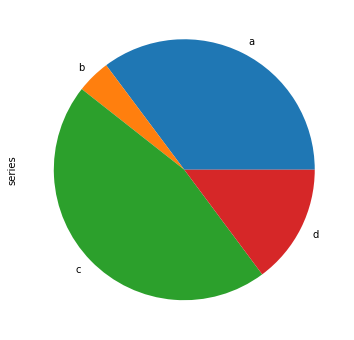

In [138]:
%pylab inline
import pandas as pd
import numpy as np

series = pd.Series(3 * np.random.rand(4), index=["a", "b", "c", "d"], name="series")

series.plot.pie(figsize=(6, 6))

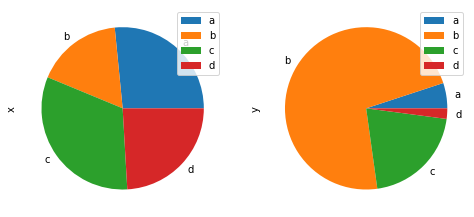

In [139]:
df = pd.DataFrame(
                    3 * np.random.rand(4, 2), index=["a", "b", "c", "d"], columns=["x", "y"]
                )


df.plot.pie(subplots=True, figsize=(8, 4));

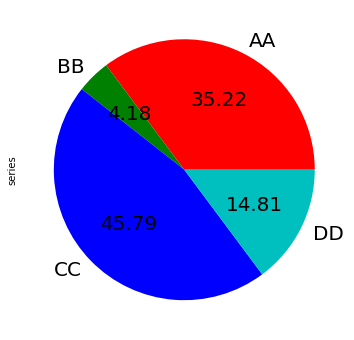

In [140]:
series.plot.pie(
                labels=["AA", "BB", "CC", "DD"],
                colors=["r", "g", "b", "c"],
                autopct="%.2f",
                fontsize=20,
                figsize=(6, 6),
                 )

## Density plot

Populating the interactive namespace from numpy and matplotlib


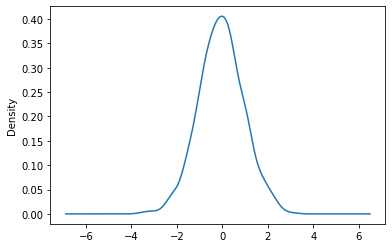

In [141]:
%pylab inline
import pandas as pd
import numpy as np

ser = pd.Series(np.random.randn(1000))

ser.plot.kde()